Предыстория вопроса состоит в том, что в работе 

https://nbviewer.org/github/daju1/articles/blob/master/electrostatic_vector_potential/Vector_potential_of_the_electrostatic_field_of_a_point_charge.ipynb

мне удалось записать векторный потенциал для кулоновского поля точечного электрического заряда. Таким образом формула для векторного потенциала кулоновского заряда получена и проверка показала, что операция ротора примененная к этому векторнному потенциалу дает кулоновское электрическое поле точечного заряда.

Полученный векторный потенциал по своей форме весьма интересный. Его вид как будто показал, что существование электростатического заряда не возможно без выделенной оси вращения.

Поэтому в настоящей работе я задаюсь следующим вопросом: может ли векторный потенциал кулоновского поля электрона создаваться, например, с помощью прецессии дипольного момента магнетона Бора?

Таким образом я рассматриваю далее следующую задачу: имеется магнитный диполь с двумя противоположно заряженными магнитными полюсами, который прецессирует вокруг оси проходящей через центр магнитного диполя. Таким образом создаётся симметричная пара кольцевых магнитных токов, которые текут во взаимно противоположных направлениях (потому как движение по окружности в одном и том же направлении, например по часовой стрелке, пары магнитных зарядов, имеющих противоположные знаки создает пару взаимно противоположных по направлению кольцевых магнитных токов).

Для решения этой задачи в литературе был найден алгоритм расчета векторного потенциала для кольцевого тока, который сводится к эллиптическим интегралам. Таким образом трехмерное интегрирование сводится к двумерному.

И теперь я записываю интегральное уравнение, которое выглядит следующим образом: в левой части формула векторного потенциала кулоновского заряда, а в правой части двойной интеграл по пространственным координатам (в цилиндрической системе координат) источников магнитного тока по объему.

Поскольку я рассматриваю не точечный магнитный заряд в составе прецессирующего диполя магнетона Бора, а распределенный в пространстве магнитный заряд, то в подынтегральном выражении моего интегрального уравнения есть два множителя: неизвестная функция плотности распределения магнитных токов в пространстве и так называемое ядро (или оператор) моего интегрального уравнения.

Интегральное уравнение решается методом итераций. Из-за вычислительных сложностей многоитерационного интегирования в данной работе представлен результат лишь нулевого приближения неизвестной функции распределения магнитных токов прецессирующего магнетона Бора в пространстве.

# Векторный потенциал кольцевого тока

Вслед за

SCIENCE TIME.
ПОТЕНЦИАЛЫ – ИСТОЧНИКИ
ЭЛЕКТРИЧЕСКИХ, МАГНИТНЫХ И
ЭЛЕКТРОМАГНИТНЫХ ПОЛЕЙ.
Черкашин Юрий Семёнович

Выберем ортогональную цилиндрическую систему координат. Вектор тока в этой системе
имеет только одну альфовую проекцию. Такую же составляющую должен иметь
и вектор А

$d\vec{A} = \frac{\mu}{4 \pi}\int\limits_{\varphi}^{}\frac{d\vec{I}}{R}$

Элемент интегрирования

$d\vec{l} = r d \varphi \,{\vec {e}}_{\varphi }$

Его проекции на направления ${\vec {e}}_{r}$  и на ${\vec {e}}_{\varphi }$: 

$dl_r = r \, d \varphi \,sin\,{\varphi }$

$dl_{\varphi} = r \, d \varphi \,cos\,{\varphi }$

радиус-вектор интегрирования

$R=\sqrt{r_j^2+r_a^2-2\,r_j\,r_a\,cos(\varphi_j)+(z_j-z_a)^2}$

Выразим подкоренное выражение в относительных единицах - вынесем $r_j$ за знак радикала.

$R=r_j\sqrt{1+\frac{r_a^2}{r_j^2}-2\,\frac{r_a}{r_j}\,cos(\varphi_j)+\frac{(z_j-z_a)^2}{r_j^2}}$

$\vec{A} = \frac{\mu}{4 \pi}\int\limits_{\varphi}^{}\frac{I \, r_j \, d \varphi \,{\vec {e}}_{\varphi }}{R}$

$dl_{\varphi} = r_j \, d \varphi \,cos\,{\varphi }$

$A_{\varphi} = \frac{\mu}{4 \pi}\int\limits_{\varphi}^{}\frac{I \, r_j \,cos\,{\varphi } \, d \varphi}{R}$

$A_{\varphi} = \frac{\mu \, I}{4 \pi}\int\limits_{\varphi_j}^{}\frac{cos\,{\varphi_j } \, d \varphi_j}{\sqrt{1+\frac{r_a^2}{r_j^2}+\frac{(z_j-z_a)^2}{r_j^2}-2\,\frac{r_a}{r_j}\,cos(\varphi_j) }}$

$A_{\varphi} = \frac{\mu \, I}{4 \pi}\int\limits_{\varphi_j}^{}\frac{cos\,{\varphi_j } \, d \varphi_j}{\sqrt{a-b\,cos(\varphi_j) }}$,

где $a = 1+\frac{r_a^2}{r_j^2}+\frac{(z_j-z_a)^2}{r_j^2}$, $b = 2\,\frac{r_a}{r_j}$

преобразуем этот интеграл:
    
$A_{\varphi} = \frac{\mu \, I}{4 \pi}\int\limits_{\varphi_j}^{}\frac{cos\,{\varphi_j} \, d \varphi_j}{\sqrt{a-b\,cos(\varphi_j) }}$

$A_{\varphi} = -\frac{\mu \, I}{4 \pi b}\int\limits_{\varphi_j}^{}\frac{-\,b\,cos\,{\varphi_j} \, d \varphi_j}{\sqrt{a-b\,cos(\varphi_j) }}$

$A_{\varphi} = -\frac{\mu \, I}{4 \pi b}\int\limits_{\varphi_j}^{}\frac{a \,-\,b\,cos\,{\varphi_j} \,-\, a }{\sqrt{a-b\,cos(\varphi_j) }}\, d \varphi_j$

$A_{\varphi} = -\frac{\mu \, I}{4 \pi b}\int\limits_{\varphi_j}^{}\frac{a \,-\,b\,cos\,{\varphi_j} }{\sqrt{a-b\,cos(\varphi_j) }}\, d \varphi_j + \frac{\mu \, I}{4 \pi b}\int\limits_{\varphi}^{}\frac{a}{\sqrt{a-b\,cos(\varphi_j) }}\, d \varphi_j$

$A_{\varphi} = \frac{\mu \, I}{4 \pi b}\int\limits_{\varphi_j}^{}\frac{a}{\sqrt{a-b\,cos(\varphi_j) }}\, d \varphi_j -\frac{\mu \, I}{4 \pi b}\int\limits_{\varphi_j}^{}{\sqrt{a-b\,cos(\varphi_j) }}\, d \varphi_j $

Он свёлся к двум интегралам, напоминающим об эллиптической форме.

Далее воспользуемся тригонометрической формулой косинус двойного угла:

$cos 2 \alpha = cos^{~2} \alpha - sin^{~2} \alpha$

$cos(\varphi_j) = cos^{~2} \left(\frac{\varphi_j}{2}\right) - sin^{~2} \left(\frac{\varphi_j}{2}\right)$

$cos(\varphi_j) = 1 - 2\,sin^{~2} \left(\frac{\varphi_j}{2}\right)$

$A_{\varphi} = \frac{\mu \, I}{4 \pi b}\int\limits_{\varphi_j}^{}\frac{a}{\sqrt{a\,-\,b\,\left(1 - 2\,sin^{~2} \left(\frac{\varphi_j}{2}\right) \right) }}\, d \varphi_j -\frac{\mu \, I}{4 \pi b}\int\limits_{\varphi_j}^{}{\sqrt{a-b\,\left(1 - 2\,sin^{~2} \left(\frac{\varphi_j}{2}\right) \right) }}\, d \varphi_j $

$A_{\varphi} = \frac{\mu \, I}{4 \pi b}\int\limits_{\varphi_j}^{}\frac{a}{\sqrt{a\,-\,b\,+\,2\,b\,sin^{~2} \left(\frac{\varphi_j}{2}\right) }}\, d \varphi_j -\frac{\mu \, I}{4 \pi b}\int\limits_{\varphi_j}^{}{\sqrt{a-b + 2\,b\,sin^{~2} \left(\frac{\varphi_j}{2}\right) }}\, d \varphi_j $

Это эллиптические интегралы, однако, перед $sin^2x$ стоит знак плюс. Сделаем замену переменных:

$\frac{\varphi_j}{2} = \psi \pm \frac{\pi}{2}$

$\psi = \frac{\varphi_j}{2} \pm \frac{\pi}{2}$

$d\varphi_j = 2 \, d \psi$

$sin^{~2} \left(\frac{\varphi_j}{2}\right) = 1-cos^{~2} \left(\frac{\varphi_j}{2}\right) = 1-sin^{~2} \psi$

Пределы 

$\varphi_j = 0$, $\psi = \frac{\pi}{2}$

$\varphi_j = 2 \pi$, $\frac{\varphi_j}{2} = \pi$, $\psi = -\frac{\pi}{2}$

$\left\{cos \,\alpha = sin \left(\frac{\pi}{2} \pm \alpha \right)\right\}$

$A_{\varphi} = \frac{2\,\mu \, I}{4 \pi b}\int\limits_{\psi}^{}\frac{a}{\sqrt{a\,-\,b\,+\,2\,b\,\left(1-sin^{~2} \psi\right) }}\, d \psi -\frac{2\,\mu \, I}{4 \pi b}\int\limits_{\psi}^{}{\sqrt{a-b + 2\,b\,\left(1-sin^{~2} \psi\right) }}\, d \psi$

$A_{\varphi} = \frac{2\,\mu \, I}{4 \pi b}\int\limits_{\psi}^{}\frac{a}{\sqrt{a\,+\,b\,-\,2\,b\,sin^{~2} \psi }}\, d \psi -\frac{2\,\mu \, I}{4 \pi b}\int\limits_{\psi}^{}{\sqrt{a\,+\,b\,-\,2\,b\,sin^{~2} \psi }}\, d \psi$

вынесем из под корня $\left(a\,+\,b\right)$, 

$A_{\varphi} = \frac{2\,\mu \, I}{4 \pi b}\frac{1}{\sqrt{a+b}}\int\limits_{\psi}^{}\frac{a}{\sqrt{1\,-\,\frac{2\,b}{a+b}\,sin^{~2} \psi }}\, d \psi -\frac{2\,\mu \, I}{4 \pi b}\sqrt{a+b}\int\limits_{\psi}^{}{\sqrt{1\,-\,\frac{2\,b}{a+b}\,sin^{~2} \psi }}\, d \psi$

обозначив $m=\frac{2\,b}{a\,+\,b}$ получим: 

$A_{\varphi} = \frac{\mu \, I}{4 \pi} \left(\frac{a}{b}\frac{2}{\sqrt{a+b}}\int\limits_{\psi}^{}\frac{d \psi}{\sqrt{1\,-\,m\,sin^{~2} \psi }} - \frac{2\sqrt{a+b}}{b}\int\limits_{\psi}^{}{\sqrt{1\,-\,m\,sin^{~2} \psi }}\, d \psi \right)$

Имеем два стандартных эллиптических интеграла.

Окончательно имеем

$A_{\varphi} = \frac{\mu \, I}{4 \pi} \left(\frac{a}{b}\frac{2}{\sqrt{a+b}}\int\limits_{0}^{\pi/2}\frac{d \psi}{\sqrt{1\,-\,m\,sin^{~2} \psi }} - \frac{2\sqrt{a+b}}{b}\int\limits_{0}^{\pi/2}{\sqrt{1\,-\,m\,sin^{~2} \psi }}\, d \psi \right)$

$A_{\varphi} = \frac{\mu \, I}{4 \pi} \left(k_K\int\limits_{0}^{\pi/2}\frac{d \psi}{\sqrt{1\,-\,m\,sin^{~2} \psi }} - k_E\int\limits_{0}^{\pi/2}{\sqrt{1\,-\,m\,sin^{~2} \psi }}\, d \psi \right)$

$k_K = \frac{a}{b}\frac{2}{\sqrt{a+b}}$

$k_E = \frac{2\sqrt{a+b}}{b}$

$A_{\varphi} = \frac{\mu \, I}{4 \pi} \left(k_K\,K(m) - k_E\,E(m) \right)$

где при принятых обозначениях

$K = \int\limits_{0}^{\pi/2}\frac{d \psi}{\sqrt{1\,-\,k^2\,sin^{~2} \psi }}$

$E = \int\limits_{0}^{\pi/2}{\sqrt{1\,-\,k^2\,sin^{~2} \psi }}\, d \psi$

есть полные эллиптические интегралы первого и второго рода

Полный нормальный эллиптический интеграл Лежандра 1-го рода

Complete elliptic integral of the first kind

class sage.functions.special.EllipticKC

Return the complete elliptic integral of the first kind:

$K(m) = \int\limits_{0}^{\pi/2}\frac{d \psi}{\sqrt{1\,-\,m\,sin^{~2} \psi }}$

sage: elliptic_kc(m)     

Полный нормальный эллиптический интеграл Лежандра 2-го рода

Complete elliptic integral of the second kind

class sage.functions.special.EllipticEC

$E(m) = \int\limits_{0}^{\pi/2}{\sqrt{1\,-\,m\,sin^{~2} \psi }}\, d \psi$

sage: elliptic_ec(m)

In [1]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))

In [2]:
z_j = var("z_j")
z_a = var("z_a")
r_j = var("r_j")
r_a = var("r_a")

assume(r_j>0)
assume(r_a>0)

$a = 1+\frac{r_a^2}{r_j^2}+\frac{(z_j-z_a)^2}{r_j^2}$, $b = 2\,\frac{r_a}{r_j}$

In [3]:
# a and b for ring
a = lambda rj, ra, zj, za : 1 + (ra/rj)^2 + ((zj-za)/rj)^2
b = lambda rj, ra : 2 * (ra/rj)

$m = \frac{2\,b}{a\,+\,b}$

In [4]:
# m for ring
m = lambda rj, ra, zj, za : 2 * b (rj, ra) / (a(rj, ra, zj, za) + b(rj, ra))

$k_K = \frac{a}{b}\frac{2}{\sqrt{a+b}}$

$k_E = \frac{2\sqrt{a+b}}{b}$

In [5]:
# k_K and k_E for ring
k_K = lambda rj, ra, zj, za : 2 * a(rj, ra, zj, za) / b(rj, ra) / sqrt(a(rj, ra, zj, za) + b(rj, ra))
k_E = lambda rj, ra, zj, za : 2 * sqrt(a(rj, ra, zj, za) + b(rj, ra)) / b(rj, ra)

$A_{\varphi} = \frac{\mu \, I}{4 \pi} \left(k_K\,K - k_E\,E \right)$

In [6]:
A_ring = lambda rj, ra, zj, za : \
       + k_K(rj, ra, zj, za) * elliptic_kc(m(rj, ra, zj, za)) \
       - k_E(rj, ra, zj, za) * elliptic_ec(m(rj, ra, zj, za))

Векторный потенциал токового кольца на высоте z=0,2r

In [7]:
plot_data_A_ring_r = []
for ir in range(1,200):
    # Расстояние от оси R/r (лин шкала)
    ra = 0.01 * ir
    A_phi_ring = A_ring(rj = 1, ra = ra, zj = 0, za = 0.2)
    plot_data_A_ring_r += [(ra, A_phi_ring)]

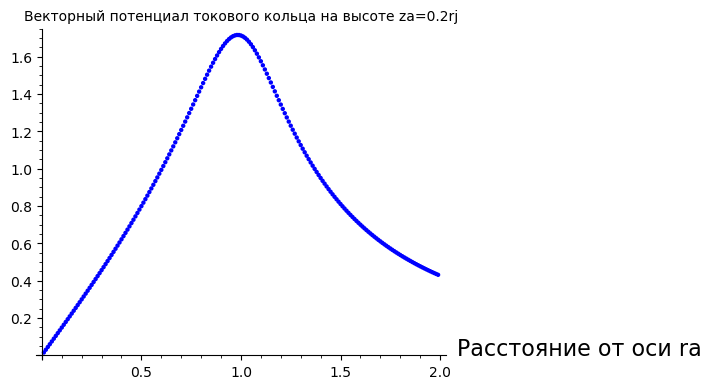

In [8]:
p = list_plot(plot_data_A_ring_r)
p.show(title="Векторный потенциал токового кольца на высоте za=0.2rj",
       axes_labels=["Расстояние от оси ra", ""])

Измерительный контур равного с кольцом диаметра приподнятый на z/r

In [9]:
plot_data_A_ring_z = []
for iz in range(1,100):
    za = 0.01 * iz
    A_phi_ring = A_ring(rj = 1, ra = 1, zj = 0, za = za)
    plot_data_A_ring_z += [(za, A_phi_ring)]

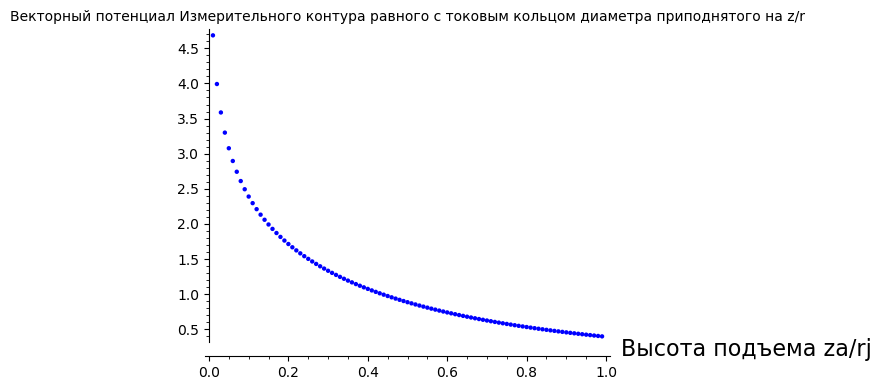

In [10]:
p = list_plot(plot_data_A_ring_z)
p.show(title="Векторный потенциал Измерительного контура равного с токовым кольцом диаметра приподнятого на z/r",
       axes_labels=["Высота подъема za/rj", ""])

# Векторный потенциал электростатического поля точечного заряда

$$\vec A = -\frac{ z}{{\rho}\sqrt{\rho^{2} + z^{2}} }\,{\vec {e}}_{\varphi }$$

In [11]:
A_q = lambda ra, za : za /(ra * sqrt(ra^2 + za^2))

In [12]:
plot_data_A_q_r = []
for ir in range(1,100):
    # Расстояние от оси R/r (лин шкала)
    ra = 0.1 * ir
    A_phi_q = A_q(ra = ra, za = 1)
    plot_data_A_q_r += [(ra, A_phi_q)]

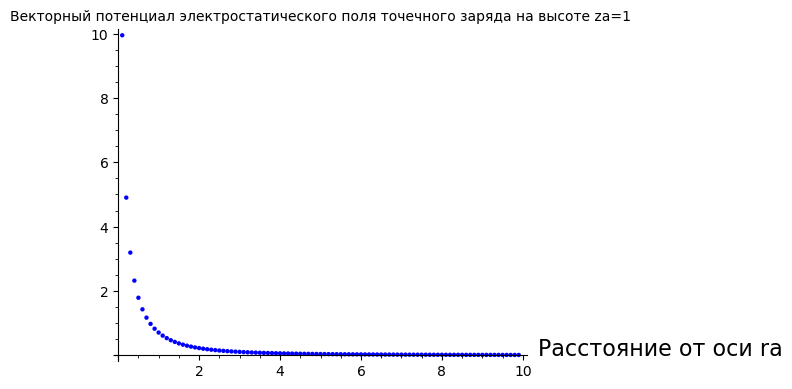

In [13]:
p = list_plot(plot_data_A_q_r)
p.show(title="Векторный потенциал электростатического поля точечного заряда на высоте za=1",
       axes_labels=["Расстояние от оси ra", ""])

Измерительный контур заданного диаметра приподнятый на высоту z

In [14]:
plot_data_A_q_z = []
for iz in range(1,100):
    za = 0.1 * iz
    A_phi_q = A_q(ra = 1, za = za)
    plot_data_A_q_z += [(za, A_phi_q)]

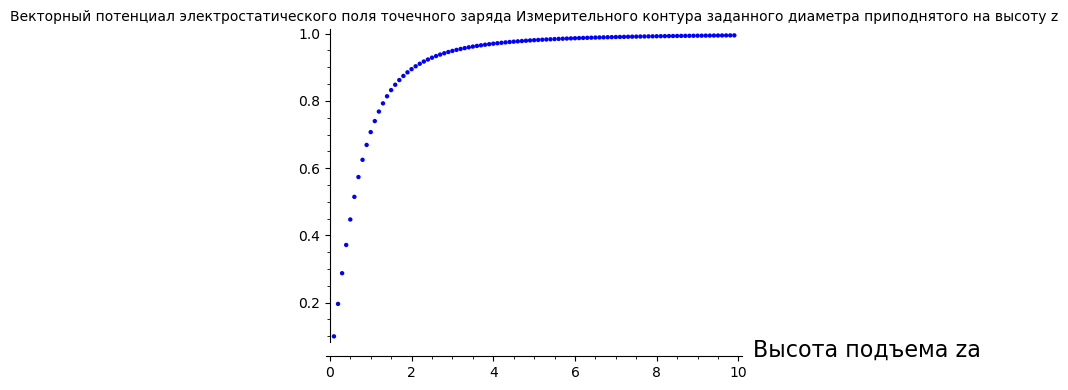

In [15]:
p = list_plot(plot_data_A_q_z)
p.show(title="Векторный потенциал электростатического поля точечного заряда Измерительного контура заданного диаметра приподнятого на высоту z",
       axes_labels=["Высота подъема za", ""])

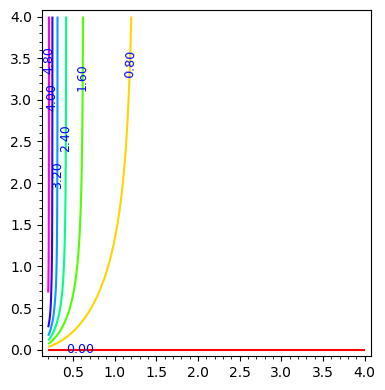

In [16]:
contour_plot(A_q(ra=r_a, za=z_a), (r_a,0.2,4), (z_a,0,4), fill=False, cmap='hsv', labels=True)

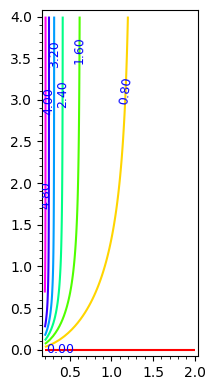

In [17]:
contour_plot(A_q(ra=r_a, za=z_a), (r_a,0.2,2), (z_a,0,4), fill=False, cmap='hsv', labels=True)

# Векторный потенциал прецессирующего магнитного диполя

In [18]:
A_dipol = lambda rj, ra, zj, za : \
        + A_ring(rj, ra, +zj, za) \
        - A_ring(rj, ra, -zj, za)

Векторный потенциал прецессирующего магнитного диполя на высоте za в зависимости от Расстояние от оси ra

In [19]:
plot_data_A_dipol_r = []
for ir in range(1,200):
    # Расстояние от оси R/r (лин шкала)
    ra = 0.1 * ir
    d = .1
    A_phi_dipol = A_dipol(rj = 1*d, ra = ra, zj = d, za = 1)
    plot_data_A_dipol_r += [(ra, A_phi_dipol)]

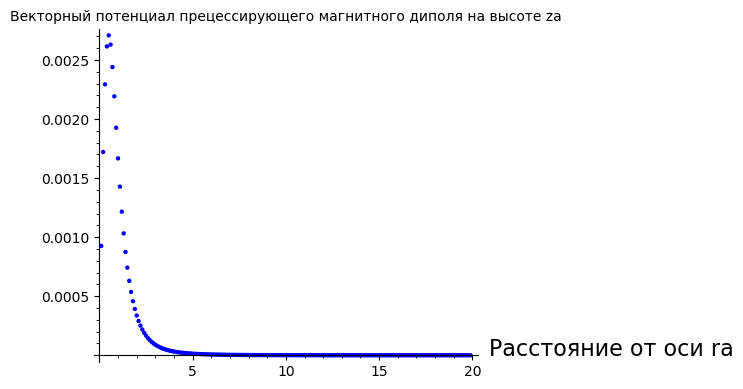

In [20]:
p = list_plot(plot_data_A_dipol_r)
p.show(title="Векторный потенциал прецессирующего магнитного диполя на высоте za",
       axes_labels=["Расстояние от оси ra", ""])

Измерительный контур равного с кольцом диаметра приподнятый на z/r

In [21]:
plot_data_A_dipol_z = []
for iz in range(1,100):
    za = 0.1 * iz
    d=1
    if (za != 1):
        A_phi_dipol = A_dipol(rj = 1*d, ra = 2, zj = 1*d, za = za)
        #print(za, A_phi_dipol)
        plot_data_A_dipol_z += [(za, A_phi_dipol)]

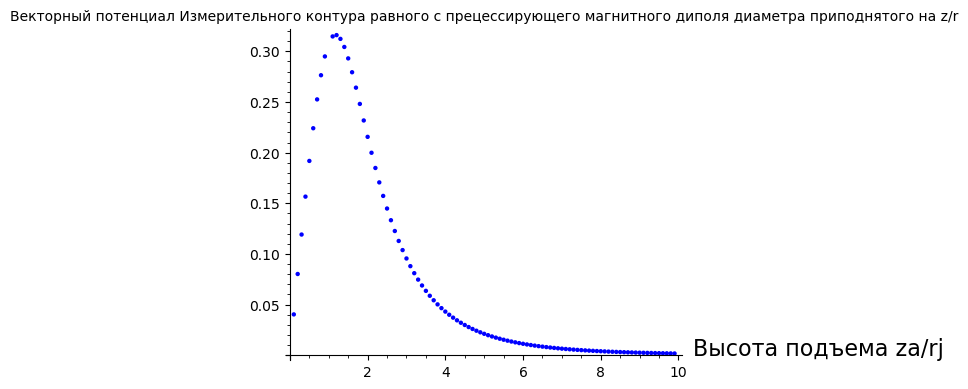

In [22]:
p = list_plot(plot_data_A_dipol_z)
p.show(title="Векторный потенциал Измерительного контура равного с прецессирующего магнитного диполя диаметра приподнятого на z/r",
       axes_labels=["Высота подъема za/rj", ""])

In [ ]:
contour_plot(A_dipol(rj = 1, ra=r_a, zj = 1, za=z_a), (r_a,0.2,4), (z_a,0,4), fill=False, cmap='hsv', labels=True)

# Интегральное уравнение для векторного потенциала кулоновского заряда 

в цилиндрической системе координат

$r_a$, $z_a$ - координаты наблюдения

$r_m$, $z_m$, $\varphi_m$ - координаты интегрирования, координаты магнитных зарядов

$-\frac{z_a}{{r_a}\sqrt{r_a^{2} + z_a^{2}} } = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{r_m=0}^{\infty}\frac{q_m(r_m, z_m)\, \omega_m (r_m, z_m)}{c} r_m \left(\int\limits_{\varphi_m=0}^{2\pi}\frac{cos\,{\varphi_m } \, d \varphi_m}{\sqrt{1+\frac{r_a^2}{r_m^2}+\frac{(z_m-z_a)^2}{r_m^2}-2\,\frac{r_a}{r_m}\,cos(\varphi_m) }}\right)d r_m \, d z_m$

Неизвестные функции

$q_m(r_m, z_m)$ - плотность магнитного заряда в зависимости от цилиндрических координат

$\omega_m (r_m, z_m)$ - круговая частота вращения

Произведя аналогичные преобразования к эллиптическим интегралам (аналогичные рассмотренным в перврй части данной работы) получим следующий вид интегрального уравнения

$-\frac{z_a}{{r_a}\sqrt{r_a^{2} + z_a^{2}} } = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{r_m=0}^{\infty}\frac{q_m(r_m, z_m)\, \omega_m (r_m, z_m)}{c} r_m \left(\frac{a}{b}\frac{2}{\sqrt{a+b}}\int\limits_{0}^{\pi/2}\frac{d \psi}{\sqrt{1\,-\,m\,sin^{~2} \psi }} - \frac{2\sqrt{a+b}}{b}\int\limits_{0}^{\pi/2}{\sqrt{1\,-\,m\,sin^{~2} \psi }}\, d \psi\right)d r_m \, d z_m$

где $a = 1+\frac{r_a^2}{r_j^2}+\frac{(z_j-z_a)^2}{r_j^2}$, $b = 2\,\frac{r_a}{r_j}$

принимая тот же вид для

$m=\frac{2\,b}{a\,+\,b}$

$k_K = \frac{a}{b}\frac{2}{\sqrt{a+b}}$

$k_E = \frac{2\sqrt{a+b}}{b}$

Перепишем теперь интегральное уравнение в виде

$-\frac{z_a}{{r_a}\sqrt{r_a^{2} + z_a^{2}} } = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{r_m=0}^{\infty}\frac{q_m(r_m, z_m)\, \omega_m (r_m, z_m)}{c} r_m \left(k_K\,K(m) - k_E\,E(m)\right)d r_m \, d z_m$

In [23]:
z_m = var("z_m")
z_a = var("z_a")
r_m = var("r_m")
r_a = var("r_a")

assume(r_m>0)
assume(r_a>0)

In [24]:
disp(a(r_m, r_a, z_m, z_a))

<IPython.core.display.Math object>

In [25]:
disp(b(r_m, r_a))

<IPython.core.display.Math object>

$m = \frac{2\,b}{a\,+\,b}$

In [26]:
disp(m(r_m, r_a, z_m, z_a))

<IPython.core.display.Math object>

$k_K = \frac{a}{b}\frac{2}{\sqrt{a+b}}$

$k_E = \frac{2\sqrt{a+b}}{b}$

In [27]:
disp(k_K(r_m, r_a, z_m, z_a))

<IPython.core.display.Math object>

In [28]:
disp(k_E(r_m, r_a, z_m, z_a))

<IPython.core.display.Math object>

ядро интегрального уравнения (в круглых скобках)

In [29]:
Jm_phi = lambda rm, ra, zm, za : \
      + k_K(rm, ra, zm, za) * elliptic_kc(m(rm, ra, zm, za)) \
      - k_E(rm, ra, zm, za) * elliptic_ec(m(rm, ra, zm, za))

In [30]:
disp(Jm_phi(r_m, r_a, z_m, z_a))

<IPython.core.display.Math object>

ядро интегрального уравнения (с учётом также и множителя $r_m$)

In [31]:
Kerm = lambda rm, ra, zm, za : rm * Jm_phi(rm, ra, zm, za)

In [32]:
disp(Kerm(r_m, r_a, z_m, z_a))

<IPython.core.display.Math object>

ядро интегрального уравнения (с учётом также и множителя $r_m$) - в дипольной форме (учитывая симметричность распределения магнитных зарядов относительно плоскости $z = 0$)

$-\frac{z_a}{{r_a}\sqrt{r_a^{2} + z_a^{2}} } = \int\limits_{z_m=0}^{\infty}\,\,\int\limits_{r_m=0}^{\infty}\frac{q_m(r_m, z_m)\, \omega_m (r_m, z_m)}{c} Kerm\_dipol(r_m, r_a, z_m, z_a) \,\, d r_m \, d z_m$

In [33]:
Kern_dipol = lambda rm, ra, zm, za : \
           + Jm_phi(rm, ra, +zm, za) \
           - Jm_phi(rm, ra, -zm, za)

In [34]:
Kerm_dipol = lambda rm, ra, zm, za : \
           + Kerm(rm, ra, +zm, za) \
           - Kerm(rm, ra, -zm, za)

In [35]:
disp(Kerm_dipol(r_m, r_a, z_m, z_a))

<IPython.core.display.Math object>

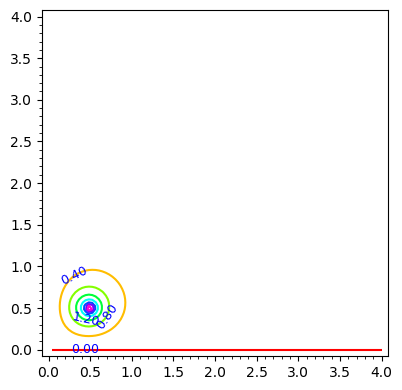

In [36]:
contour_plot(Kern_dipol(rm = 0.5, ra=r_a, zm = 0.5, za=z_a), (r_a,0,4), (z_a,0,4), fill=False, cmap='hsv', labels=True)

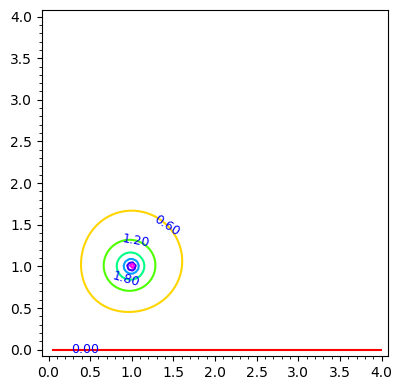

In [37]:
contour_plot(Kern_dipol(rm = 1, ra=r_a, zm = 1, za=z_a), (r_a,0,4), (z_a,0,4), fill=False, cmap='hsv', labels=True)

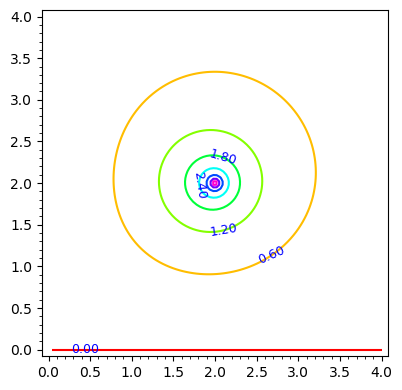

In [38]:
contour_plot(Kern_dipol(rm = 2, ra=r_a, zm = 2, za=z_a), (r_a,0,4), (z_a,0,4), fill=False, cmap='hsv', labels=True)

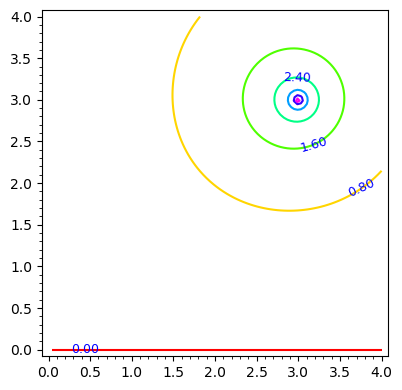

In [39]:
contour_plot(Kern_dipol(rm = 3, ra=r_a, zm = 3, za=z_a), (r_a,0,4), (z_a,0,4), fill=False, cmap='hsv', labels=True)

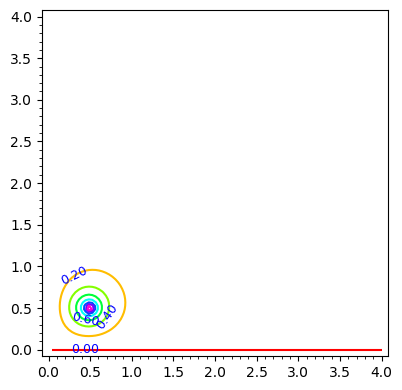

In [40]:
contour_plot(Kerm_dipol(rm = 0.5, ra=r_a, zm = 0.5, za=z_a), (r_a,0,4), (z_a,0,4), fill=False, cmap='hsv', labels=True)

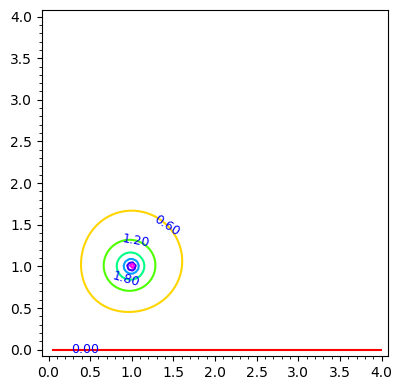

In [41]:
contour_plot(Kerm_dipol(rm = 1, ra=r_a, zm = 1, za=z_a), (r_a,0,4), (z_a,0,4), fill=False, cmap='hsv', labels=True)

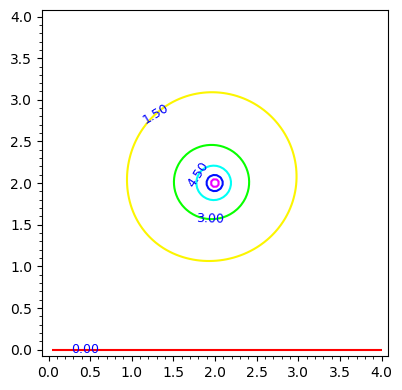

In [42]:
contour_plot(Kerm_dipol(rm = 2, ra=r_a, zm = 2, za=z_a), (r_a,0,4), (z_a,0,4), fill=False, cmap='hsv', labels=True)

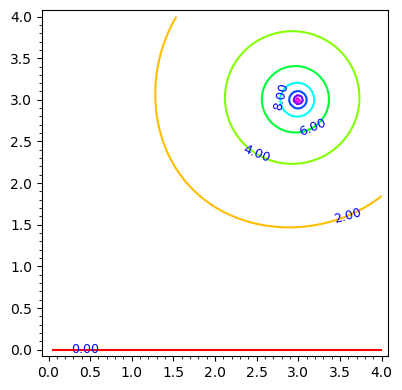

In [43]:
contour_plot(Kerm_dipol(rm = 3, ra=r_a, zm = 3, za=z_a), (r_a,0,4), (z_a,0,4), fill=False, cmap='hsv', labels=True)

Несмотря на то, что решение интегрального уравнения для векторного потенциала кулоновского заряда пока что не получено, но анализ контурных графиков показывает, что при увеличении координат интегрирования $r_m$, $z_m$, т.е. координат магнитных зарядов общая "энергия" (интеграл по обьему координат наблюдения) для ядра этого интегрального уравнения растёт. Следовательно, поскольку в левой части интегрального уравнения константа, то есть при интегрировании произведения неизвестной функции (распределение плотности магнитных зарядов и их скорости) на ядро интегрального уравнения по координатам магнитных зарядов мы должны получить константу во всем обьёме координат наблюдения, постольку искомая неизвестная функция распределенния магнитных токов является убывающей по мере отдаления от центра частицы

In [44]:
Kerm_dipol(rm = 1, ra=1, zm = 1, za=1).n()

+infinity

In [45]:
Kern_dipol(rm = 1, ra=1, zm = 1, za=1).n()

+infinity

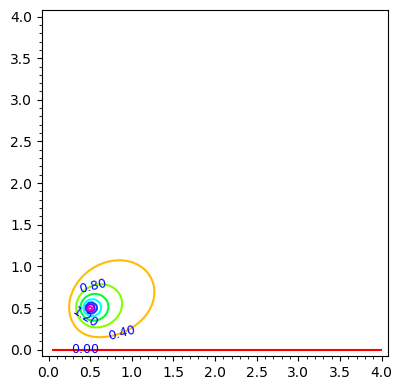

In [46]:
contour_plot(Kern_dipol(rm = r_m, ra=0.5, zm = z_m, za=0.5), (r_m,0,4), (z_m,0,4), fill=False, cmap='hsv', labels=True)

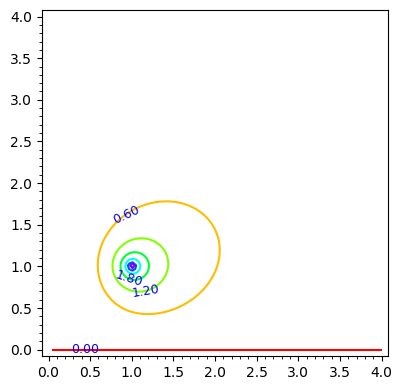

In [47]:
contour_plot(Kern_dipol(rm = r_m, ra=1.0, zm = z_m, za=1.0), (r_m,0,4), (z_m,0,4), fill=False, cmap='hsv', labels=True)

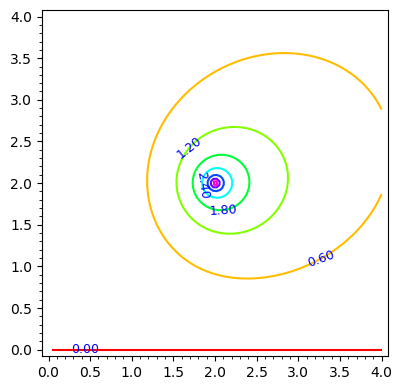

In [48]:
contour_plot(Kern_dipol(rm = r_m, ra=2.0, zm = z_m, za=2.0), (r_m,0,4), (z_m,0,4), fill=False, cmap='hsv', labels=True)

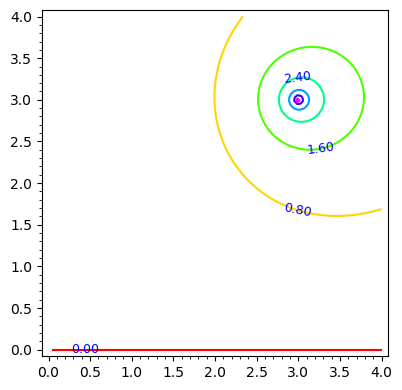

In [49]:
contour_plot(Kern_dipol(rm = r_m, ra=3.0, zm = z_m, za=3.0), (r_m,0,4), (z_m,0,4), fill=False, cmap='hsv', labels=True)

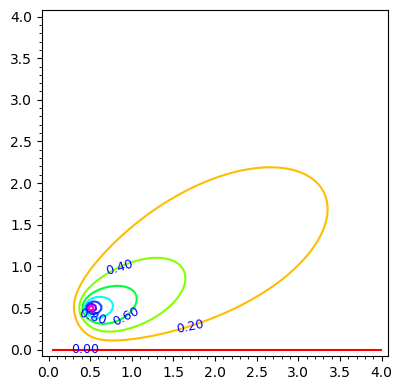

In [50]:
contour_plot(Kerm_dipol(rm = r_m, ra=0.5, zm = z_m, za=0.5), (r_m,0,4), (z_m,0,4), fill=False, cmap='hsv', labels=True)

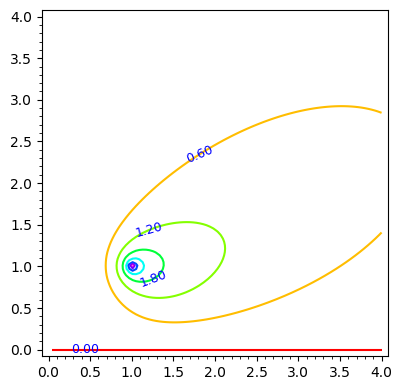

In [51]:
contour_plot(Kerm_dipol(rm = r_m, ra=1.0, zm = z_m, za=1.0), (r_m,0,4), (z_m,0,4), fill=False, cmap='hsv', labels=True)

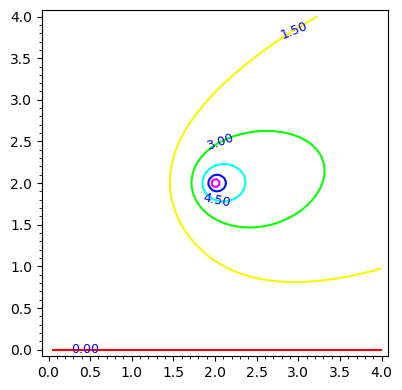

In [52]:
contour_plot(Kerm_dipol(rm = r_m, ra=2.0, zm = z_m, za=2.0), (r_m,0,4), (z_m,0,4), fill=False, cmap='hsv', labels=True)

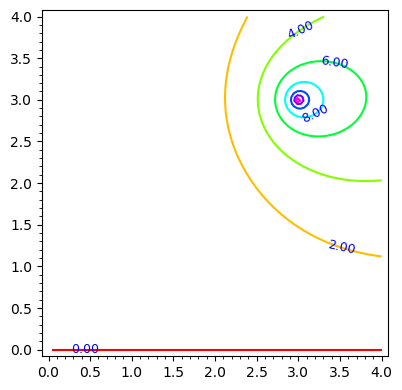

In [53]:
contour_plot(Kerm_dipol(rm = r_m, ra=3.0, zm = z_m, za=3.0), (r_m,0,4), (z_m,0,4), fill=False, cmap='hsv', labels=True)

# Решение интегрального уравнения для векторного потенциала кулоновского заряда методом итераций

В качестве нулевого приближения для неизвестной функции $\frac{q_m(r_m, z_m)\, \omega_m (r_m, z_m)}{c}$ в интегральном уравнении

$-\frac{z_a}{{r_a}\sqrt{r_a^{2} + z_a^{2}} }(r_a, z_a) = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{r_m=0}^{\infty}\frac{q_m(r_m, z_m)\, \omega_m (r_m, z_m)}{c} r_m \left(k_K(r_m, r_a, z_m, z_a)\,K(m(r_m, r_a, z_m, z_a)) - k_E(r_m, r_a, z_m, z_a)\,E(m(r_m, r_a, z_m, z_a))\right)d r_m \, d z_m$

примем равномерное единичное распределение плотности магнитного тока во всем пространстве

$\frac{q_m(r_m, z_m)\, \omega_m (r_m, z_m)}{c} = 1$

При этом нулевое приближение интеграла в правой части выглядит следующим образом

$E_0(r_a, z_a) = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{r_m=0}^{\infty} r_m \left(k_K(r_m, r_a, z_m, z_a)\,K(m(r_m, r_a, z_m, z_a)) - k_E(r_m, r_a, z_m, z_a)\,E(m(r_m, r_a, z_m, z_a))\right)d r_m \, d z_m$

В такой формулировке поле $E_0(r_a, z_a)$ в координатах наблюдения представляет собой "отражение" влияния орператора (или ядра) интегрального уравнения на поле значений потенциала в координатах наблюдения со стороны равномерно распределеленной во всем пространстве плотности магнитного тока (искомой неизвестной функции координат магнитного тока, координат интегрирования).

А поскольку решением интегрального уравнения является такое значение неизвестной функции $\frac{q_m(r_m, z_m)\, \omega_m (r_m, z_m)}{c}$, воздействие интегрального ядра на которое приведёт к полю потенциала $-\frac{z_a}{{r_a}\sqrt{r_a^{2} + z_a^{2}} }(r_a, z_a)$ в координтах наблюдения, то исходя из свойства локальности ядра интегрирования (то есть исходя из того свойства, что "точечный" магнитный ток в большей степени влияет на поле потенциала находящееся в непосредственной близости от точки истока), то в качестве первого приближения неизвестной искомой функции логично выбрать 

$\left(\frac{q_m(r_m, z_m)\, \omega_m (r_m, z_m)}{c}\right)_1 = \frac{-\frac{z_a}{{r_a}\sqrt{r_a^{2} + z_a^{2}} }(r_a=r_m, z_a=z_m)}{E_0(r_a=r_m, z_a=z_m)}$

Таким образом мы получаем следующее (первое) приближение интеграла в правой части уравнения

$E_1(r_a, z_a) = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{r_m=0}^{\infty}\left(\frac{q_m(r_m, z_m)\, \omega_m (r_m, z_m)}{c}\right)_1 r_m \left(k_K(r_m, r_a, z_m, z_a)\,K(m(r_m, r_a, z_m, z_a)) - k_E(r_m, r_a, z_m, z_a)\,E(m(r_m, r_a, z_m, z_a))\right)d r_m \, d z_m$

или

$E_1(r_a, z_a) = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{r_m=0}^{\infty}\frac{-\frac{z_a}{{r_a}\sqrt{r_a^{2} + z_a^{2}} }(r_a=r_m, z_a=z_m)}{E_0(r_a=r_m, z_a=z_m)} r_m \left(k_K(r_m, r_a, z_m, z_a)\,K(m(r_m, r_a, z_m, z_a)) - k_E(r_m, r_a, z_m, z_a)\,E(m(r_m, r_a, z_m, z_a))\right)d r_m \, d z_m$

В соответствии с той же логикой (локальность ядра интегрирования и стремление получить поле потенциала вида $-\frac{z_a}{{r_a}\sqrt{r_a^{2} + z_a^{2}} }(r_a, z_a)$ в результате интегрирования) в качестве второго приближения неизвестной искомой функции логично выбрать 

$\left(\frac{q_m(r_m, z_m)\, \omega_m (r_m, z_m)}{c}\right)_2 = \frac{-\frac{z_a}{{r_a}\sqrt{r_a^{2} + z_a^{2}} }(r_a=r_m, z_a=z_m)}{E_0(r_a=r_m, z_a=z_m)}\cdot\frac{-\frac{z_a}{{r_a}\sqrt{r_a^{2} + z_a^{2}} }(r_a=r_m, z_a=z_m)}{E_1(r_a=r_m, z_a=z_m)}$

и так далее

In [54]:
def calc_Kerm_dipol_integral(Ra, Za, Rm1, Rm2, Zm1, Zm2):
    Kerm_dipol_ra_za = lambda rm, zm : Kerm_dipol(rm, Ra, zm, Za)

    Kerm_dipol_ra_za_int_rm = lambda Zm : Kerm_dipol_ra_za(r_m, Zm).integral(r_m, Rm1, Rm2)
    Kerm_dipol_ra_za_int_rm_int_zm = Kerm_dipol_ra_za_int_rm(z_m).integral(z_m, Zm1, Zm2)
    
    return Kerm_dipol_ra_za_int_rm_int_zm

In [55]:
def get_integrand_view(f):
    return f(x)

class my_dummy_integral:
    f = None
    a = None
    b = None
    def __init__(self, f, a, b):
        print ("my_dummy_integral ", f, a, b)
        self.f = f
        self.a = a
        self.b = b

def num_int(f, a, b):
    from scipy import integrate

    to_call_integration = True

    if type(f) is my_dummy_integral:
        to_call_integration = False

    import inspect
    stack = inspect.stack()
    for frame in stack:
        func_name = frame[3]
        # print ("func_name = ", func_name)
        if ('get_integrand_view' == func_name):
            to_call_integration = False
            break;

    if not to_call_integration:
        return my_dummy_integral(f,a,b)

    try:
        integral = integrate.quad(f, a, b)

        result = integral[0]
        return result

    except Exception as ex:

        print ("Exception ex = ", str(ex))
        print ("f = ", f)
        try:
            print ("integrand = ", get_integrand_view(f))
        except Exception as ex2:
            print ("Exception ex2 = ", ex2)
        print ("a = ", a)
        print ("b = ", b)

        raise ex

        integral = numerical_integral(f, a, b)

        print ("integral = ", integral)

        result = integral[0]
        print ("result = ", result)
        return result


In [56]:
def calc_Kerm_dipol_numerical_integral(Ra, Za, Rm1, Rm2, Zm1, Zm2):
    Kerm_dipol_ra_za = lambda rm, zm : Kerm_dipol(rm, Ra, zm, Za)

    Kerm_dipol_ra_za_int_rm = lambda Zm : num_int(lambda rm : (Kerm_dipol_ra_za(rm, Zm)), Rm1, Rm2)
    Kerm_dipol_ra_za_int_rm_int_zm = num_int(lambda zm : Kerm_dipol_ra_za_int_rm(zm), Zm1, Zm2)
    
    return Kerm_dipol_ra_za_int_rm_int_zm

In [57]:
def calc_Kerm_dipol_numerical_integral_delta(Ra, Za, delta):
    Rm1 = 0
    Rm2 = infinity
    Zm1 = 0
    Zm2 = Za - delta
    Int1 = calc_Kerm_dipol_numerical_integral(Ra, Za, Rm1, Rm2, Zm1, Zm2)

    Rm1 = 0
    Rm2 = infinity
    Zm1 = Za + delta
    Zm2 = infinity
    Int2 = calc_Kerm_dipol_numerical_integral(Ra, Za, Rm1, Rm2, Zm1, Zm2)
    
    Rm1 = 0
    Rm2 = Ra - delta
    Zm1 = Za - delta
    Zm2 = Za + delta
    Int3 = calc_Kerm_dipol_numerical_integral(Ra, Za, Rm1, Rm2, Zm1, Zm2)

    Rm1 = Ra + delta
    Rm2 = infinity
    Zm1 = Za - delta
    Zm2 = Za + delta
    Int4 = calc_Kerm_dipol_numerical_integral(Ra, Za, Rm1, Rm2, Zm1, Zm2)
    
    return Int1 + Int2 + Int3 + Int4

In [58]:
def calc_Kerm_dipol_integral_delta(Ra, Za, delta):
    Rm1 = 0
    Rm2 = infinity
    Zm1 = 0
    Zm2 = Za - delta
    Int1 = calc_Kerm_dipol_integral(Ra, Za, Rm1, Rm2, Zm1, Zm2)

    Rm1 = 0
    Rm2 = infinity
    Zm1 = Za + delta
    Zm2 = infinity
    Int2 = calc_Kerm_dipol_integral(Ra, Za, Rm1, Rm2, Zm1, Zm2)
    
    Rm1 = 0
    Rm2 = Ra - delta
    Zm1 = Za - delta
    Zm2 = Za + delta
    Int3 = calc_Kerm_dipol_integral(Ra, Za, Rm1, Rm2, Zm1, Zm2)

    Rm1 = Ra + delta
    Rm2 = infinity
    Zm1 = Za - delta
    Zm2 = Za + delta
    Int4 = calc_Kerm_dipol_integral(Ra, Za, Rm1, Rm2, Zm1, Zm2)
    
    return Int1 + Int2 + Int3 + Int4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#ga_linspace = np.linspace(0.01, 0.99, 99)
ra_linspace = np.linspace(0.05, 1, 20)
za_linspace = np.linspace(0.05, 1, 20)

ra_list = ra_linspace.tolist()
za_list = za_linspace.tolist()

ra_grid,za_grid = np.meshgrid(ra_linspace, za_linspace)

u = ra_grid * np.nan
v = za_grid * np.nan

for ir in np.arange(0, len(ra_linspace), 1):
    for iz in np.arange(0, len(za_linspace), 1):
        Ra = ra_list[ir]
        Za = ra_list[iz]
        u[iz][ir] = calc_Kerm_dipol_numerical_integral_delta(Ra = Ra, Za = Za, delta = 0.025)
        print(Ra, Za, u[iz][ir], A_q(ra=Ra, za=Za)/u[iz][ir])

/tmp/ipykernel_460/1170869244.py:35: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral = integrate.quad(f, a, b)
/tmp/ipykernel_460/1170869244.py:35: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  integral = integrate.quad(f, a, b)
/tmp/ipykernel_460/1170869244.py:35: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral = in

0.05 0.05 -3.541321298622142e+29 -3.9934630131508745e-29
0.05 0.1 134386129245.71703 1.3311302230671575e-10
0.05 0.15 32.74006347909494 0.57952440969228
0.05 0.2 43.061238031341375 0.4505873702187709
0.05 0.25 5217635656.921257 3.7587165535031866e-09
0.05 0.3 10026270248378.816 1.9676188640369777e-12


In [ ]:
fig,ax=plt.subplots(1,1)

cp = ax.contourf(ra_grid,za_grid, u)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('$E_0(r_a, z_a)$')
ax.set_xlabel('r_a')
ax.set_ylabel('z_a')
plt.show()

# Интегральное уравнение для векторного потенциала кулоновского заряда 

в цилиндрической системе координат

$r_a$, $z_a$ - координаты наблюдения

$r_m$, $z_m$, $\varphi_m$ - координаты интегрирования, координаты магнитных зарядов

$-\frac{z_a}{{r_a}\sqrt{r_a^{2} + z_a^{2}} } = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{r_m=0}^{\infty}\frac{q_m(r_m, z_m)\, \omega_m (r_m, z_m)}{c} r_m^2 \left(\int\limits_{\varphi_m=0}^{2\pi}\frac{cos\,{\varphi_m } \, d \varphi_m}{\sqrt{r_m^2+r_a^2-2\,r_m\,r_a\,cos(\varphi_m)+(z_m-z_a)^2}}\right)d r_m \, d z_m$

$-c\frac{z_a}{{r_a}\sqrt{r_a^{2} + z_a^{2}} } = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{r_m=0}^{\infty}  \left(\int\limits_{\varphi_m=0}^{2\pi}\frac{q_m(r_m, z_m)\, \omega_m (r_m, z_m)\,cos\,{\varphi_m } r_m^2\, d \varphi_m}{\sqrt{r_m^2+r_a^2-2\,r_m\,r_a\,cos(\varphi_m)+(z_m-z_a)^2}}\right)d r_m \, d z_m$

$-c\frac{z_a}{{r_a}\sqrt{r_a^{2} + z_a^{2}} } = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{r_m=0}^{\infty}  \left(\int\limits_{\varphi_m=0}^{2\pi}\frac{r_m\, q_m(r_m, z_m)\, \omega_m (r_m, z_m)\,cos\,{\varphi_m }\, r_m\, d \varphi_m}{\sqrt{r_m^2+r_a^2-2\,r_m\,r_a\,cos(\varphi_m)+(z_m-z_a)^2}}\right)d r_m \, d z_m$

Получаем уравнение для потенциала

$-c\frac{z_a}{{r_a}\sqrt{r_a^{2} + z_a^{2}} } = \int\limits_{V}^{}\frac{r_m\, q_m(r_m, z_m)\, \omega_m (r_m, z_m)\,cos\,{\varphi_m }}{R}d V$,

которое удовлетворяет уравнению Пуассона

$\nabla^{2}\frac{z}{{r}\sqrt{r^{2} + z^{2}} } = \frac{r\, q_m(r, z)\, \omega_m (r, z)\,cos\,{\varphi }}{c}$.

нам потребуются интегралы по координатному углу $\varphi$ точек истока от нуля до $2\pi$ и $\int\limits_{0}^{2\pi}{\frac{cos\left(\varphi\right)}{R}}d{\varphi} = 0$

$\int\limits_{0}^{2\pi}{\frac{sin\left(\varphi\right)}{R}}d{\varphi} = 0$

$R=\sqrt{(r_j\,sin(\varphi_j)-r_a\,sin(\varphi_a))^2+(r_j\,cos(\varphi_j)-r_a\,cos(\varphi_a))^2+(z_j-z_a)^2}$

Ввиду цилиндрической симметрии и ввиду того что

$\frac{\partial A}{\partial \varphi_a} = 0$

нам не потребуется дифференцирование векторного потенциала по $\varphi_a$ координате точек наблюдения, можно упростить расчёт полагая, что $\varphi_a = 0$, тогда 

$R=\sqrt{r_j^2+r_a^2-2\,r_j\,r_a\,cos(\varphi_j)+(z_j-z_a)^2}$

In [ ]:
phi_j = var("phi_j")
Rja2       = lambda rj, ra, zj, za, phi_j : rj^2 + ra^2 - 2*rj*ra*cos(phi_j) + (zj-za)^2
one_per_R  = lambda rj, ra, zj, za, phi_j : 1 / sqrt(Rja2(rj, ra, zj, za, phi_j))
a_phi      = lambda rj, ra, zj, za, phi_j : cos(phi_j) * one_per_R(rj, ra, zj, za, phi_j)

In [ ]:
phi = var("phi")

In [ ]:
a_phi_dipol = lambda rj, ra, zj, za, phi_j : a_phi(rj, ra, zj, za, phi_j) - a_phi(rj, ra, -zj, za, phi_j)


In [ ]:
disp(Rja2(r_j, r_a, z_j, z_a, phi_j))

In [ ]:
disp(a_phi(r_j, r_a, z_j, z_a, phi_j))

In [ ]:
plot(a_phi(rj = 10, ra = 10.25, zj = 0, za = 0, phi_j = phi_j), phi_j, 0, 2*pi)

In [ ]:
x, y, z = var("x,y,z")

In [ ]:
A_E = \
(y*z/(sqrt(x^2 + y^2 + z^2)*(x^2 + y^2)),
 -x*z/(sqrt(x^2 + y^2 + z^2)*(x^2 + y^2)),
 0)

In [ ]:
for AEi in A_E:
    disp(AEi.subs(x == r_a*cos(phi), y == r_a*sin(phi)).full_simplify())

In [ ]:
A_y = -x*z/(sqrt(x^2 + y^2 + z^2)*(x^2 + y^2))

In [ ]:
A_y0 = A_y.subs(y == 0)
A_y0

In [ ]:
num_int( lambda phi_j : a_phi(rj = 10, ra = 10.5, zj = 1, za = 1.1, phi_j = phi_j), 0, 2*pi)

In [ ]:
num_int( lambda phi_j : a_phi(rj = 10, ra = 10.5, zj = -1, za = 1.1, phi_j = phi_j), 0, 2*pi)

In [ ]:
num_int( lambda phi_j : a_phi_dipol(rj = 10, ra = 10.5, zj = 1, za = 1.1, phi_j = phi_j), 0, 2*pi)

In [ ]:
A_dipol = lambda rj, ra, zj, za : num_int( lambda phi_j : a_phi_dipol(rj = rj, ra = ra, zj = zj, za = za, phi_j = phi_j), 0, 2*pi)

In [ ]:
A_dipol(rj = 1, ra = 1, zj = 1, za = 1.1)

In [ ]:
plot_data_A_phi_dipol_r = []
for ir in range(100):
    ra = 0.1 * ir
    A_phi_dipol = A_dipol(rj = 0.0001, ra = ra, zj = 0.0001, za = 1)
    plot_data_A_phi_dipol_r += [(ra, A_phi_dipol)]

In [ ]:
p = list_plot(plot_data_A_phi_dipol_r)
for ik in range(2):
    k = -0.00000001*(ik+3)
    print(k)
    p += plot(k*A_y0.subs(z == 1), x, 0.3, 10)
p.show()

In [ ]:
plot_data_A_phi_dipol_z = []
for iz in range(100):
    za = 1 + 0.1 * iz
    A_phi_dipol = A_dipol(rj = 0.0001, ra = 1, zj = 0.0001, za = za)
    plot_data_A_phi_dipol_z += [(za, A_phi_dipol)]

In [ ]:
A_y0.subs(x == 4)

In [ ]:
list_plot(plot_data_A_phi_dipol_z)

In [ ]:
p = list_plot(plot_data_A_phi_dipol_z)
for ik in range(2):
    k = -0.000000001*(ik+3)
    print(k)
    p += plot(k*A_y0.subs(x == 1), z, 0.3, 10)
p.show()